In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from iflow.dataset import gen_cycle_dataset
from data.human_robot_interaction_data.read_hh_hr_data import read_data
from iflow.dataset.iros_dataset import IROS

import torch
import torch.optim as optim
from iflow.dataset import drums_dataset, gen_cycle_dataset
from torch.utils.data import DataLoader
from iflow import model
from iflow.trainers import cycle_dynamics_train
from iflow.utils.generic import to_torch

import matplotlib.pyplot as plt
import numpy as np

from iflow.visualization import visualize_vector_field, visualize_trajectories
from iflow.test_measures.log_likelihood import cycle_log_likelihood

In [2]:
data_p, data_q, names, times = read_data('data/human_robot_interaction_data/hh/p1/hand_shake_s1_1.csv')
segments = np.load('data/human_robot_interaction_data/hh/segmentation/hand_shake_1.npy')
trajs = [data_p[s[0]:s[1], :, :] for s in segments]

# downsample
stepsize = 1
cutoff = 400

trajs_downsampled = np.array([a[::stepsize,:,:][:cutoff] for a in trajs])
trajs_downsampled.shape
trajs = trajs_downsampled.reshape(19,cutoff,26*3)[:,:,-3:]

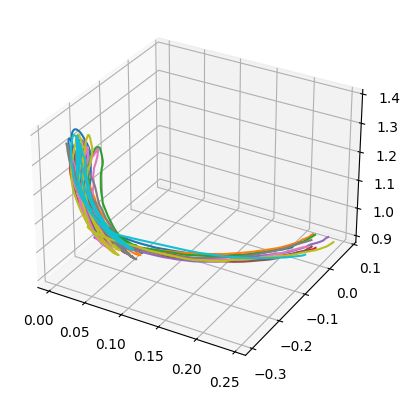

In [3]:
p = -1
ax = plt.figure().add_subplot(projection='3d')
for i in range(0,10):
    ax.plot(trajs_downsampled[i,:,p,0],-trajs_downsampled[i,:,p,2],trajs_downsampled[i,:,p,1])

In [4]:
#trajs = np.load('data/DRUMS_dataset/Drums.npy')
#trajs = np.load('data/IROS_dataset/RShape.npy')

In [4]:
data = gen_cycle_dataset.GENCYCLE(trajs, 3)

In [5]:
batch_size = 100
depth = 10
## optimization ##
lr = 0.001
weight_decay = 0.1
## training variables ##
nr_epochs = 1000

device = torch.device('cpu')

In [6]:
def main_layer(dim):
    return  model.ResNetCouplingLayer(dim)

def create_flow_seq(dim, depth):
    chain = []
    for i in range(depth):
        chain.append(main_layer(dim))
        chain.append(model.RandomPermutation(dim))
        chain.append(model.LULinear(dim))
    chain.append(main_layer(dim))
    return model.SequentialFlow(chain)

In [7]:
dim = data.dim
T_period = (2*np.pi)/data.w
params = {'batch_size': batch_size, 'shuffle': True}
dataloader = DataLoader(data.dataset, **params)

lsd = model.LinearLimitCycle(dim, device, dt=data.dt, T_period=T_period)
flow = create_flow_seq(dim, depth)
iflow = model.ContinuousDynamicFlow(dynamics=lsd, model=flow, dim=dim).to(device)

params = list(flow.parameters()) + list(lsd.parameters())
optimizer = optim.Adamax(params, lr = lr, weight_decay= weight_decay)

/Users/arnebackstein/PycharmProjects/iflow/iflow/model/flows/lu.py:71: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2197.)
  y, _ = torch.triangular_solve(y.t(), lower, upper=False, unitriangular=True)


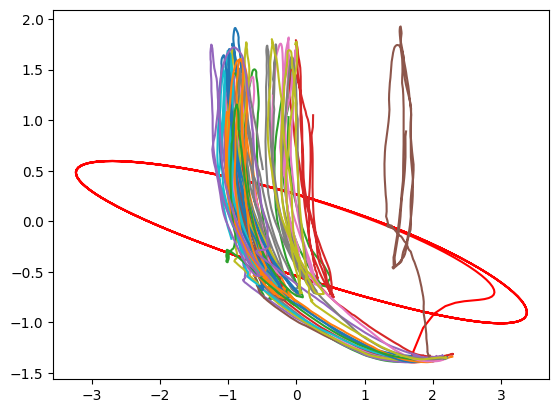

Validation data Conditional Log Likelihood : -196.9724578857422 | log pz : -193.62762451171875 | log detJ : -3.344791889190674
Validation data Stable Log Likelihood : -9.190271377563477 | log pz : -5.8365068435668945 | log detJ : -3.3537635803222656


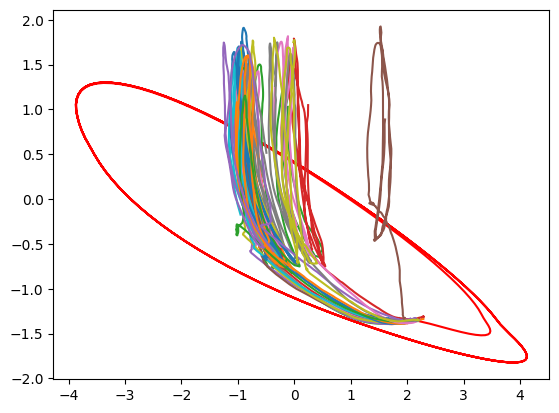

Validation data Conditional Log Likelihood : -134.9269256591797 | log pz : -129.54525756835938 | log detJ : -5.381646633148193
Validation data Stable Log Likelihood : -11.093762397766113 | log pz : -5.745523452758789 | log detJ : -5.348239421844482


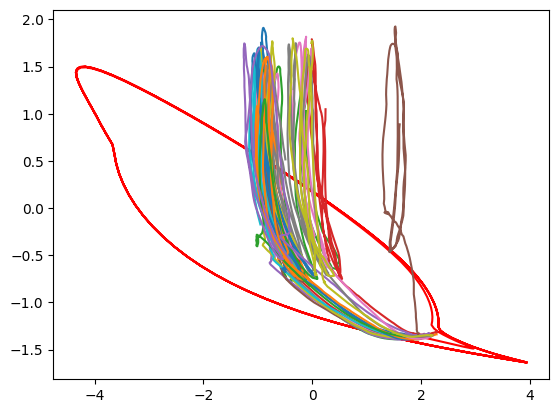

Validation data Conditional Log Likelihood : -107.18531799316406 | log pz : -101.93494415283203 | log detJ : -5.2503743171691895
Validation data Stable Log Likelihood : -11.349786758422852 | log pz : -6.156534194946289 | log detJ : -5.1932525634765625


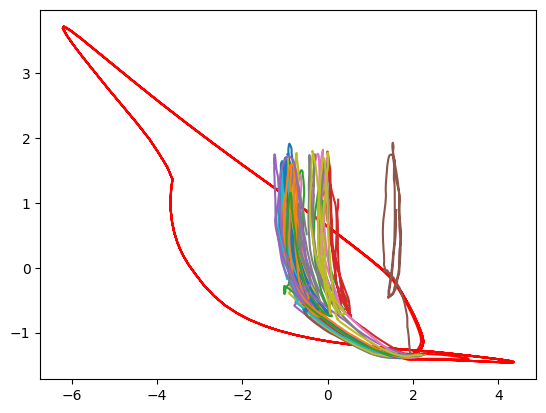

Validation data Conditional Log Likelihood : -73.44086456298828 | log pz : -68.53205108642578 | log detJ : -4.908807277679443
Validation data Stable Log Likelihood : -11.047473907470703 | log pz : -6.248443126678467 | log detJ : -4.7990312576293945


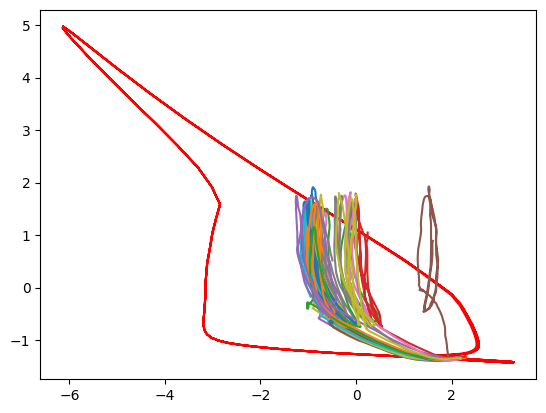

Validation data Conditional Log Likelihood : -48.00200271606445 | log pz : -43.47293472290039 | log detJ : -4.529069900512695
Validation data Stable Log Likelihood : -10.717277526855469 | log pz : -6.320221900939941 | log detJ : -4.397055625915527


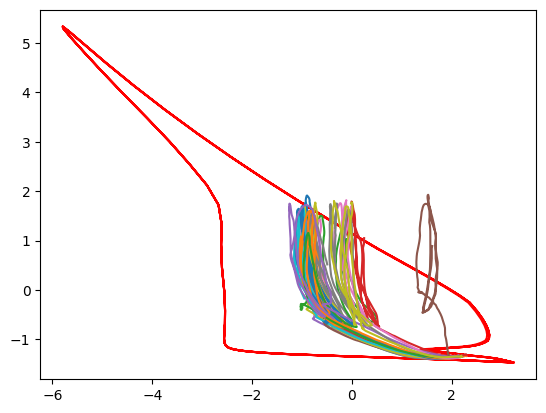

Validation data Conditional Log Likelihood : -33.87468338012695 | log pz : -29.717269897460938 | log detJ : -4.157413959503174
Validation data Stable Log Likelihood : -10.433431625366211 | log pz : -6.413931369781494 | log detJ : -4.0194993019104


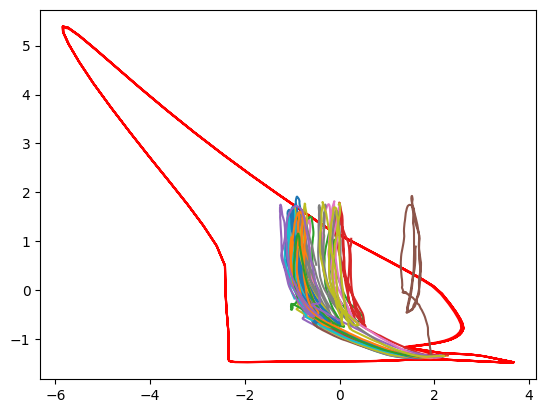

Validation data Conditional Log Likelihood : -18.85015106201172 | log pz : -14.883020401000977 | log detJ : -3.9671316146850586
Validation data Stable Log Likelihood : -10.205377578735352 | log pz : -6.376578330993652 | log detJ : -3.828798294067383


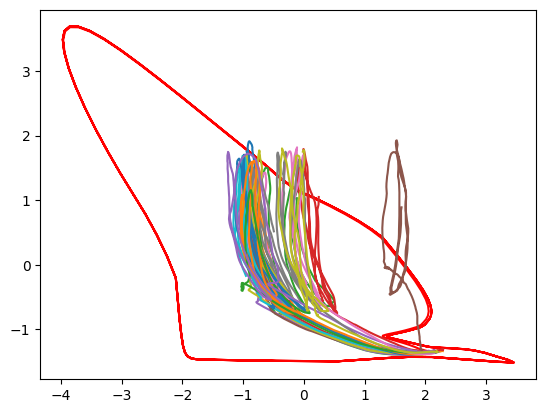

Validation data Conditional Log Likelihood : -17.21430206298828 | log pz : -13.573293685913086 | log detJ : -3.64100980758667
Validation data Stable Log Likelihood : -9.894075393676758 | log pz : -6.391201496124268 | log detJ : -3.5028741359710693


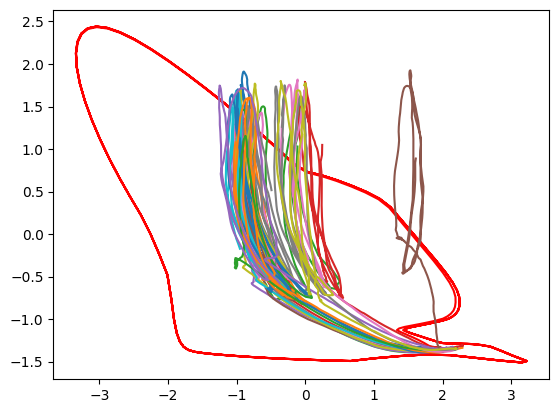

Validation data Conditional Log Likelihood : -14.981464385986328 | log pz : -11.611323356628418 | log detJ : -3.3701400756835938
Validation data Stable Log Likelihood : -9.640987396240234 | log pz : -6.406072616577148 | log detJ : -3.2349140644073486


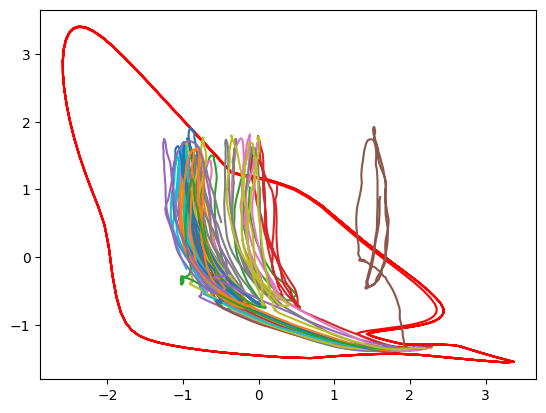

Validation data Conditional Log Likelihood : -12.88143253326416 | log pz : -9.761308670043945 | log detJ : -3.120124578475952
Validation data Stable Log Likelihood : -9.262910842895508 | log pz : -6.266831398010254 | log detJ : -2.996079683303833


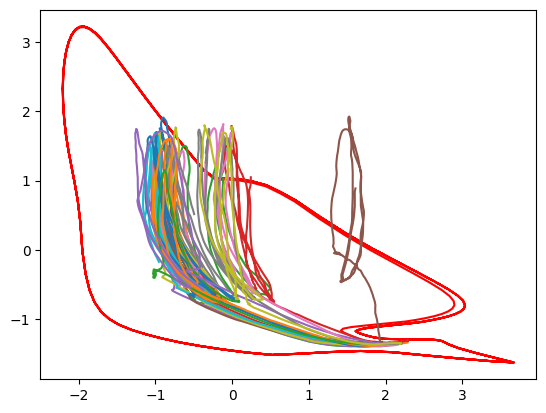

Validation data Conditional Log Likelihood : -10.798325538635254 | log pz : -7.978558540344238 | log detJ : -2.819765090942383
Validation data Stable Log Likelihood : -8.776121139526367 | log pz : -6.060589790344238 | log detJ : -2.715531587600708


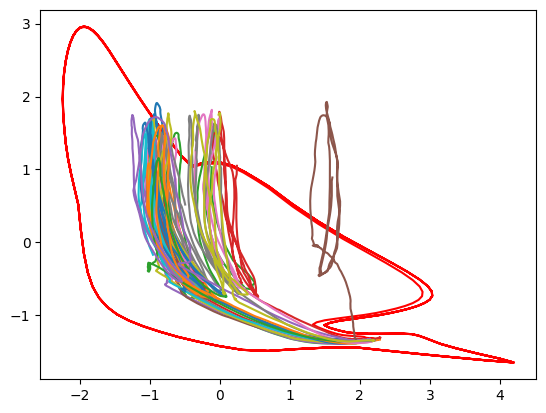

Validation data Conditional Log Likelihood : -6.553893566131592 | log pz : -4.015742778778076 | log detJ : -2.5381503105163574
Validation data Stable Log Likelihood : -8.426849365234375 | log pz : -5.972386837005615 | log detJ : -2.4544613361358643


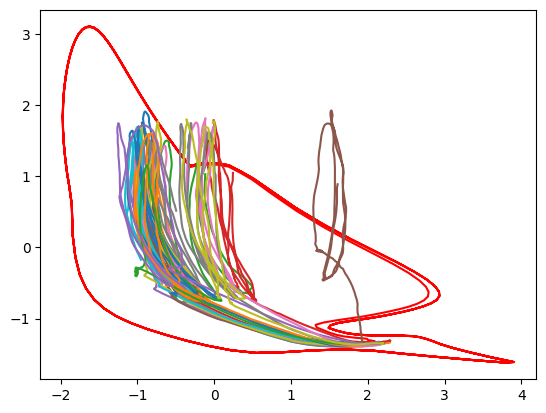

Validation data Conditional Log Likelihood : -6.968809127807617 | log pz : -4.617749214172363 | log detJ : -2.351059675216675
Validation data Stable Log Likelihood : -8.014460563659668 | log pz : -5.745133399963379 | log detJ : -2.2693262100219727


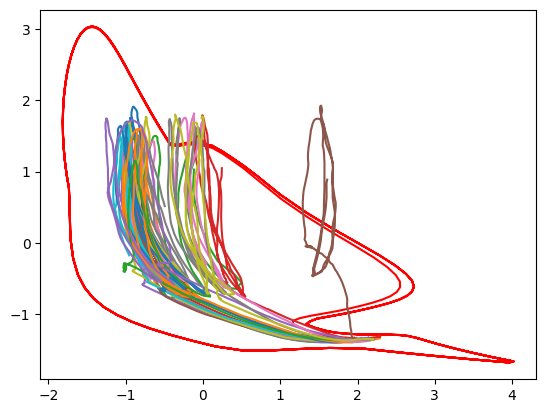

Validation data Conditional Log Likelihood : -6.54773473739624 | log pz : -4.387490272521973 | log detJ : -2.160245180130005
Validation data Stable Log Likelihood : -7.746769428253174 | log pz : -5.657247543334961 | log detJ : -2.089521646499634


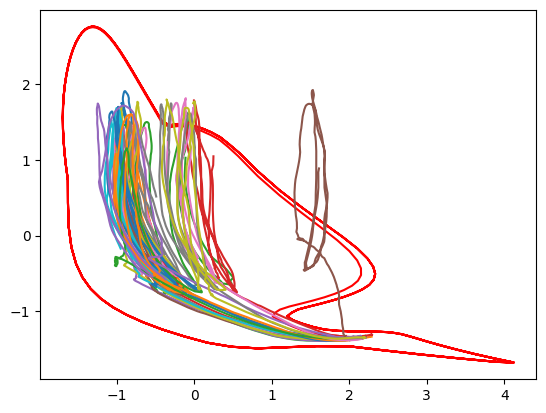

Validation data Conditional Log Likelihood : -5.499163627624512 | log pz : -3.595808267593384 | log detJ : -1.9033551216125488
Validation data Stable Log Likelihood : -7.332222938537598 | log pz : -5.489377975463867 | log detJ : -1.8428452014923096


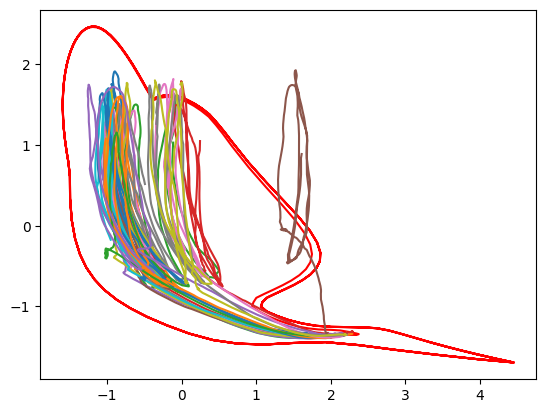

Validation data Conditional Log Likelihood : -4.380208492279053 | log pz : -2.7079215049743652 | log detJ : -1.672287106513977
Validation data Stable Log Likelihood : -6.95919942855835 | log pz : -5.337705135345459 | log detJ : -1.621494174003601


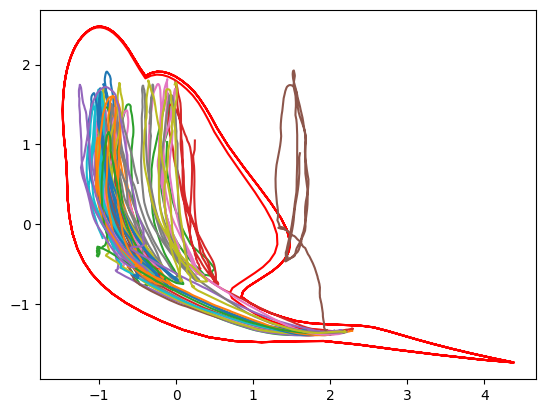

Validation data Conditional Log Likelihood : -3.9962544441223145 | log pz : -2.58594012260437 | log detJ : -1.4103139638900757
Validation data Stable Log Likelihood : -6.5355095863342285 | log pz : -5.166938781738281 | log detJ : -1.368571400642395


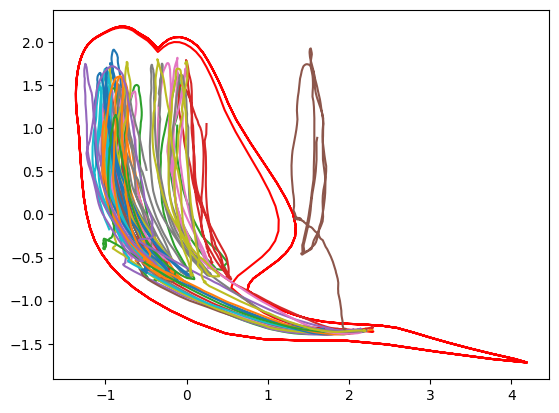

Validation data Conditional Log Likelihood : -3.6809208393096924 | log pz : -2.5977180004119873 | log detJ : -1.083202600479126
Validation data Stable Log Likelihood : -6.169646739959717 | log pz : -5.115322113037109 | log detJ : -1.0543243885040283


KeyboardInterrupt: 

In [8]:
for i in range(nr_epochs):
    # Training
    for local_x, local_y in dataloader:
        dataloader.dataset.set_step()
        optimizer.zero_grad()
        loss = cycle_dynamics_train(iflow, local_x, local_y)
        loss.backward(retain_graph=True)
        optimizer.step()

    ## Validation ##
    if i%10 == 0:
        with torch.no_grad():
            iflow.eval()

            # plotting
            out = iflow.generate_trj(torch.from_numpy(data.train_data[0][0][None, :]).float().to(device), data.train_data[0].shape[0])
            out = out.detach().cpu().numpy()
            plt.plot(out[:,0], out[:,1], 'r')
            for t in data.train_data:
                plt.plot(t[:,0], t[:,1])
            plt.show()

            # likelihood
            step = 20
            trj = data.train_data[0]
            trj_x0 = to_torch(trj[:-step,:], device)
            trj_x1 = to_torch(trj[step:,:], device)
            phase = to_torch(data.train_phase_data[0][:-step], device)
            cycle_log_likelihood(trj_x0, trj_x1, phase, step, iflow, device)

In [40]:
y0 = torch.from_numpy(data.train_data[0][0][None, :]).float().to(device)
y = torch.from_numpy(data.train_data[0]).float().to(device)
T = data.train_data[0].shape[0]
z0 = iflow.flow_forward(y0)

# x_k := x_known
len_known = 2
x = iflow.flow_forward(y)
x_k = x[:,-len_known:]


mu = iflow.dynamics.generate_trj(z0, T)


In [41]:
sigma_kk = iflow.dynamics.var[-len_known:, -len_known:]
sigma_ku = iflow.dynamics.var[-len_known:, :-len_known]
sigma_uk = iflow.dynamics.var[:-len_known, -len_known:]
sigma_uu = iflow.dynamics.var[:-len_known, :-len_known]


mu_u = mu[:,:,:-len_known]
mu_k = mu[:,:,-len_known:]

In [45]:
x_k.shape, mu_k.shape, mu_u.shape

(torch.Size([400, 2]), torch.Size([400, 1, 2]), torch.Size([400, 1, 1]))

In [57]:
mu_u.shape

torch.Size([400, 1, 1])

In [65]:
### 

x_u = mu_u + (( sigma_uk@torch.inverse(sigma_kk) ) @ ((x_k.reshape(mu_k.shape) - mu_k)).reshape([400,2,1]))

In [66]:
x_u = x_u.detach().numpy().reshape(400,1)
x_k = x_k.detach().numpy()

In [67]:
x = np.concatenate([x_u, x_k], axis=1)

In [70]:
o1 = iflow.flow_backward(torch.from_numpy(x)).detach().numpy()

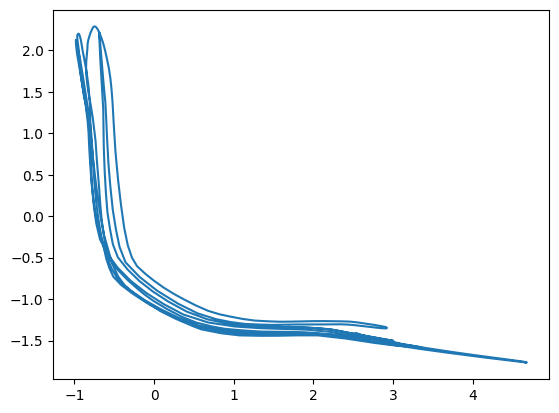

In [71]:

plt.plot(o1[:,0], o1[:,1])

In [109]:
out = iflow.generate_trj(torch.from_numpy(data.train_data[0][0][None, :]).float().to(device), data.train_data[0].shape[0])
out = out.detach().numpy()

In [ ]:
fig_number = 3
val_trj = data.train_data


_trajs = np.zeros((0, 2))
for trj in val_trj:
    _trajs = np.concatenate((_trajs, trj),0)
min = _trajs.min(0) - 0.5
max = _trajs.max(0) + 0.5

n_sample = 100

x = np.linspace(min[0], max[0], n_sample)
y = np.linspace(min[1], max[1], n_sample)

xy = np.meshgrid(x, y)
h = np.concatenate(xy[0])
v = np.concatenate(xy[1])
hv = torch.Tensor(np.stack([h, v]).T).float()
if device is not None:
    hv = hv.to(device)

hv_t1 = iflow.evolve(hv, T=3)
hv = hv.detach().cpu().numpy()
hv_t1 = hv_t1.detach().cpu().numpy()

vel = (hv_t1 - hv)

vel_x = np.reshape(vel[:, 0], (n_sample, n_sample))
vel_y = np.reshape(vel[:, 1], (n_sample, n_sample))
speed = np.sqrt(vel_x ** 2 + vel_y ** 2)
speed = speed/np.max(speed)

fig = plt.figure(fig_number, figsize=(10, 10))
plt.clf()
ax = plt.gca()

plt.streamplot(xy[0], xy[1], vel_x, vel_y, density=[0.5, 1])
for i in range(len(val_trj)):
    plt.plot(val_trj[i][:,0], val_trj[i][:,1], 'b')
plt.draw()
plt.pause(0.05)
plt.show()